In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tweepy
import datetime 
consumer_key = "gYUJycQnc3XKMNzl2YIakT0ID"
consumer_secret = "14ZhdDuq9VGj5Zja51POFzfWzRHViAQQYAsmsFkzYNq0dSPc6m"
access_token = "1205328182003609602-LzxarwBW0gikQeeQHJNwkvQg5Taem5"
access_token_secret = "ljOHAPuZmzHyGtU47PQvl3ODwiX6ENBaSjpAgeAnHmC75"


# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)

#Tweeter historical database

https://catalog.docnow.io/

https://tweetsets.library.gwu.edu/
   
https://snap.stanford.edu/data/


# Hydrate

https://github.com/lopezbec/COVID19_Tweets_Dataset/blob/master/Old_Tweets_ID_by_keyword/Automatically_Hydrate_TweetsIDs_COVID19.ipynb


# Refrences:
https://programminghistorian.org/en/lessons/beginners-guide-to-twitter-data

https://towardsdatascience.com/twitter-json-data-processing-3f353a5deac4

Example: https://github.com/hectoramirez/Language-localization_FIFA

Tweeter REST API: https://towardsdatascience.com/downloading-data-from-twitter-using-the-rest-api-24becf413875


# Fact cheking

https://leadstories.com/

https://www.politifact.com/

https://www.poynter.org/covid-19-poynter-resources/

https://www.factcheck.org/a-guide-to-our-coronavirus-coverage/

https://www.snopes.com/

https://euvsdisinfo.eu/

Newsguard is a browser extension that manually labels websites on a score from 0-100 on reputability, though.

# Covid 19

https://ieee-dataport.org/open-access/coronavirus-covid-19-tweets-dataset



# Mapping
https://www.tableau.com/

https://programminghistorian.org/en/lessons/mapping-with-python-leaflet

https://digitalfellows.commons.gc.cuny.edu/2019/06/03/finding-the-right-tools-for-mapping/


# Web scrapper

https://www.webscraper.io/tutorials



# Creat a world map

https://towardsdatascience.com/using-python-to-create-a-world-map-from-a-list-of-country-names-cd7480d03b10

In [3]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
true_news=pd.read_excel('/content/drive/Shareddrives/MY Files/Ethics in CS/LIWC2015 Results (politifact_true).xlsx')
false_news=pd.read_excel('/content/drive/Shareddrives/MY Files/Ethics in CS/LIWC2015 Results (politifact_false).xlsx')
#pants_on_fire=pd.read_csv('/content/drive/Shareddrives/MY Files/Publi_cpolicy_climate change/climatechange_pantsonfire.csv')


dt_adult = true_news
#pd.read_csv
print('Size of data before sampling:',dt_adult.shape)
Data=pd.DataFrame(dt_adult )
Data.head()
#Data.columns

Size of data before sampling: (44, 15)


,web-scraper-order,web-scraper-start-url,sourse,title,date,link,link-href,keywords,wholetext,WC,posemo,negemo,anx,anger,sad
0,1616474877-8651,https://www.politifact.com/factchecks/list/?pa...,M.J. Hegar,Says 1 in 5 Texans did not have health insuran...,"stated on July 22, 2020 in a speech:",Says 1 in 5 Texans did not have health insuran...,https://www.politifact.com/factchecks/2020/jul...,Health Care\n\n\n\n\nTexas\n\n\n\n\nCoronaviru...,After a primary campaign extended by the coron...,1141,2.10,1.14,0.00,0.00,1.14
1,1616474740-8622,https://www.politifact.com/factchecks/list/?pa...,Bloggers,“Whole of Italy goes into quarantine.”,"stated on March 10, 2020 in a blog post:",“Whole of Italy goes into quarantine.”,https://www.politifact.com/factchecks/2020/mar...,Facebook Fact-checks\n\n\n\n\nCoronavirus\n\n\...,"The coronavirus is now a pandemic, so far infe...",552,1.09,1.27,0.18,0.36,0.36
2,1616474868-8649,https://www.politifact.com/factchecks/list/?pa...,Chris Hayes,"""Higher education is one of America's stronges...","stated on July 7, 2020 in a TV segment:","""Higher education is one of America's stronges...",https://www.politifact.com/factchecks/2020/jul...,Immigration\n\n\n\n\nEconomy\n\n\n\n\nEducatio...,A new Trump administration directive targeting...,789,0.63,0.25,0.00,0.13,0.13
3,1616474907-8659,https://www.politifact.com/factchecks/list/?pa...,JB Pritzker,"“Republican elected officials, a network of pr...","stated on November 17, 2020 in remarks at a ne...","“Republican elected officials, a network of pr...",https://www.politifact.com/factchecks/2020/dec...,Fake news\n\n\n\n\nIllinois\n\n\n\n\nCoronavir...,While explaining why his family would not be t...,980,1.73,1.33,0.10,0.31,0.20
4,1616474825-8639,https://www.politifact.com/factchecks/list/?pa...,Veronica Escobar,Says Texas “either is near the bottom or at th...,"stated on April 22, 2020 in an interview:",Says Texas “either is near the bottom or at th...,https://www.politifact.com/factchecks/2020/apr...,Texas\n\n\n\n\nCoronavirus\n\n\n\n\n\n\n\nVero...,As state leaders in Texas look to ease restric...,825,1.09,0.48,0.00,0.00,0.36


# Date

In [ ]:
import time

data_tweet=Data
OK=data_tweet['date']
df = pd.DataFrame()
data_tweet['Time']=''
data_tweet['Year']=''
data_tweet['Month']=''
data_tweet['Day']=''



for i in range(OK.shape[0]):
   X=OK[i]
  
   split_string = X.split("in", 1)
   X = split_string[0]

   #Y= time.strftime('%Y%m%d%H', time.strptime(X,'%a %b %d %H:%M:%S +0000 %Y'))
   Y= time.strftime('%Y%m', time.strptime(X,'stated on %B %d, %Y '))
   data_tweet.at[i,'Time']=pd.to_numeric(Y)

   Y1=time.strftime('%Y', time.strptime(X,'stated on %B %d, %Y ') )
   Y2= time.strftime('%m', time.strptime(X,'stated on %B %d, %Y '))
   Y3= time.strftime('%d', time.strptime(X,'stated on %B %d, %Y '))

   data_tweet.at[i,'Year']=pd.to_numeric(Y1)
   data_tweet.at[i,'Month']=pd.to_numeric(Y2)
   data_tweet.at[i,'Day']=pd.to_numeric(Y3)



#data_tweet['Time']
#data_tweet.drop(['Time'], axis=1, inplace=True)
#data_tweet['time']=df['Time']
data_tweet=data_tweet.sort_values(by=['Time'])
data_tweet2=data_tweet.copy()
data_tweet.head()
   

,web-scraper-order,web-scraper-start-url,sourse,title,date,link,link-href,keywords,wholetext,WC,posemo,negemo,anx,anger,sad,Time,Year,Month,Day
21,1616474763-8627,https://www.politifact.com/factchecks/list/?pa...,Dan Crenshaw,Says longstanding Food and Drug Administration...,"stated on March 13, 2020 in a tweet:",Says longstanding Food and Drug Administration...,https://www.politifact.com/factchecks/2020/mar...,Government Regulation\n\n\n\n\nTexas\n\n\n\n\n...,Accusations about the responsible party behind...,1135,1.85,0.79,0.18,0.26,0.18,202003,2020,3,13
17,1616474804-8635,https://www.politifact.com/factchecks/list/?pa...,Facebook posts,"“The poor are, ironically, the most likely to ...","stated on March 18, 2020 in a Facebook post:","“The poor are, ironically, the most likely to ...",https://www.politifact.com/factchecks/2020/apr...,National\n\n\n\n\nCoronavirus\n\n\n\n\nPennsyl...,In the earliest days of the coronavirus outbre...,792,1.26,1.01,0.13,0.00,0.51,202003,2020,3,18
14,1616474758-8626,https://www.politifact.com/factchecks/list/?pa...,Andrew Cuomo,“No city in the state can quarantine itself wi...,"stated on March 17, 2020 in a news conference:",“No city in the state can quarantine itself wi...,https://www.politifact.com/factchecks/2020/mar...,New York\n\n\n\n\nCoronavirus\n\n\n\n\n\n\n\nA...,"Gov. Andrew Cuomo, trying to calm fears amid t...",817,2.33,0.98,0.73,0.00,0.12,202003,2020,3,17
32,1616474770-8628,https://www.politifact.com/factchecks/list/?pa...,Pat Toomey,“My mask will keep someone else safe and their...,"stated on March 28, 2020 in a video on Twitter:",“My mask will keep someone else safe and their...,https://www.politifact.com/factchecks/2020/apr...,National\n\n\n\n\nCoronavirus\n\n\n\n\nPennsyl...,"Last weekend, U.S. Sen. Pat Toomey recorded a ...",748,1.87,0.53,0.27,0.00,0.00,202003,2020,3,28
11,1616474754-8625,https://www.politifact.com/factchecks/list/?pa...,Kelly Alexander,"Says ""most"" NC legislators are in the ""high ri...","stated on March 11, 2020 in a tweet:","Says ""most"" NC legislators are in the ""high ri...",https://www.politifact.com/factchecks/2020/mar...,North Carolina\n\n\n\n\nCoronavirus\n\n\n\n\n\...,"To prevent the spread of coronavirus, one stat...",693,0.43,1.73,1.59,0.00,0.00,202003,2020,3,11


In [ ]:
data_tweet.columns

Index(['web-scraper-order', 'web-scraper-start-url', 'sourse', 'title', 'date',
       'link', 'link-href', 'keywords', 'wholetext', 'WC', 'posemo', 'negemo',
       'anx', 'anger', 'sad', 'Time', 'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
#true news
data_tweet.drop(['web-scraper-order','web-scraper-start-url','sourse','title','link',"Month","Day",'Year','date','wholetext','keywords','link','link-href'], axis=1, inplace=True)
#fake news
#data_tweet.drop(['web-scraper-order','web-scraper-start-url','source','title','ex_link',"Month","Day",'Year','date','text','key words','ex_link-href'], axis=1, inplace=True)
data_tweet1 = data_tweet.groupby(['Time']).sum()
data_tweet.head()

,WC,posemo,negemo,anx,anger,sad,Time
21,1135,1.85,0.79,0.18,0.26,0.18,202003
17,792,1.26,1.01,0.13,0.00,0.51,202003
14,817,2.33,0.98,0.73,0.00,0.12,202003
32,748,1.87,0.53,0.27,0.00,0.00,202003
11,693,0.43,1.73,1.59,0.00,0.00,202003


In [ ]:
#true news
data_tweet2.drop(['web-scraper-order','web-scraper-start-url','sourse','title','link',"Month","Day",'Year','date','wholetext','keywords','link','link-href','WC','posemo','negemo','anx','anger','sad'], axis=1, inplace=True)
#fake news
#data_tweet2.drop(['web-scraper-order','web-scraper-start-url','source','title','ex_link',"Month","Day",'Year','date','text','key words','ex_link-href','WC','posemo','negemo','anx','anger','sad'], axis=1, inplace=True)
#data_tweet.drop(['id','user_followers_count','language','location','location_code' ], axis=1, inplace=True)
#Data_tweet['time']-=20170000 
data_tweet_frequency = data_tweet2.pivot_table(index=['Time'], aggfunc='size')
data_tweet=data_tweet2.groupby(['Time']).sum()
data_tweet['frequency']=data_tweet_frequency 
data_tweet.head()
ALL_Data=data_tweet.merge(data_tweet1, on='Time')
ALL_Data.head()
#data_tweet.to_excel('/content/drive/Shareddrives/MY Files/Tweeter Data/output.xlsx')

,frequency,WC,posemo,negemo,anx,anger,sad
Time,,,,,,,
202003,9,7430,13.98,8.27,3.81,1.01,1.36
202004,10,8877,13.63,9.92,2.39,2.16,2.12
202005,4,2881,7.30,4.40,0.50,0.23,1.31
202006,5,3164,7.37,5.93,0.97,1.73,0.90
202007,3,2452,6.18,3.31,0.00,1.09,1.46


In [ ]:
ALL_Data['frequency']

Time
202003     9
202004    10
202005     4
202006     5
202007     3
202009     2
202010     3
202011     1
202012     3
202101     3
202102     1
Name: frequency, dtype: int64

([<matplotlib.axis.XTick at 0x7f6cfd0ed6d0>,
 [Text(0, 0, 'March 2020'),
  Text(0, 0, 'April 2020'),
  Text(0, 0, 'May 2020'),
  Text(0, 0, 'June 2020'),
  Text(0, 0, 'July 2020'),
  Text(0, 0, 'September 2020'),
  Text(0, 0, 'Octobor 2020'),
  Text(0, 0, 'Novomber 2020'),
  Text(0, 0, 'December 2020'),
  Text(0, 0, 'January 2021'),
  Text(0, 0, 'Febraury 2021')])

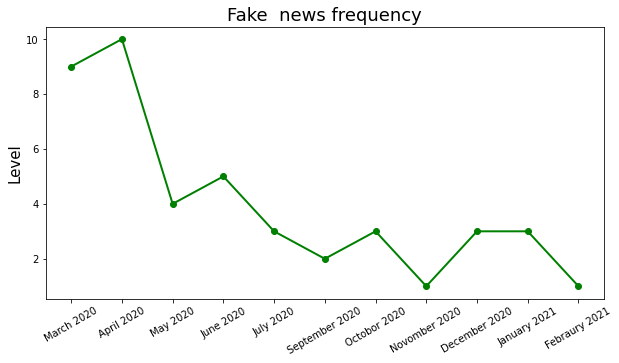

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#scaler.fit(np.array(ALL_Data['frequency']/ALL_Data['WC']).reshape(-1, 1))
#positive_emotion =scaler.transform(np.array(ALL_Data['frequency']/ALL_Data['WC']).reshape(-1, 1))


positive_emotion =np.array(ALL_Data['frequency'])
  

plt.figure(figsize=(10,5))
#x = np.arange(1,ALL_Data['frequency'].shape[0]) 
plt.plot(positive_emotion, 'go-', linewidth=2)  
plt.title("Fake  news frequency", fontsize=18) 
#plt.xlabel("Month", fontsize=15) 
plt.ylabel("Level", fontsize=15) 

#True news
plt.xticks(np.arange(11), ['March 2020','April 2020','May 2020','June 2020','July 2020','September 2020','Octobor 2020', 'Novomber 2020','December 2020','January 2021','Febraury 2021'],rotation=30)  


#fake news
#plt.xticks(np.arange(15), ['January 2020','Febraury 2020','March 2020','April 2020','May 2020','June 2020','July 2020','August 2020','September 2020','Octobor 2020', 'Novomber 2020','December 2020','January 2021','Febraury 2021','March 2021'],rotation=30)  

